#kaggle

In [1]:
!mkdir -p ~/.kaggle # 1️⃣ Make a hidden folder called ".kaggle" inside your home directory (~)
!cp kaggle.json ~/.kaggle/ # 2️⃣ Copy the Kaggle API key file (kaggle.json) into that folder
!chmod 600 ~/.kaggle/kaggle.json # 3️⃣ Restrict file permissions so only you can read it (for security)


## 🧠 Downloading Leukemia Blood Cell Image Dataset from Kaggle using kagglehub

In [2]:


# Install the kagglehub library (quietly, without extra logs)
!pip install kagglehub --quiet

# Import the kagglehub package
import kagglehub

# 📦 Download the dataset from Kaggle by specifying its dataset ID
# "sumithsingh/blood-cell-images-for-cancer-detection" is the Kaggle dataset path
# kagglehub.dataset_download() automatically handles authentication and download
path = kagglehub.dataset_download("sumithsingh/blood-cell-images-for-cancer-detection")

# ✅ Print the local path where the dataset has been downloaded and extracted
print("✅ Path to dataset files:", path)


100%|██████████| 122M/122M [00:01<00:00, 107MB/s]

Extracting files...


✅ Path to dataset files: /root/.cache/kagglehub/datasets/sumithsingh/blood-cell-images-for-cancer-detection/versions/2


# 📂 Viewing the Contents of the Downloaded Dataset Folder

In [3]:
# 📂 Viewing the Contents of the Downloaded Dataset Folder

# The !ls command lists files and folders inside a directory.
# Options used:
#  -l : shows detailed information (permissions, size, date, name)
#  -h : makes file sizes "human readable" (e.g., 2.3M instead of 2345678)
# "$path" : is the variable holding the dataset directory path we downloaded earlier.

!ls -lh "$path"


total 180K
drwxr-xr-x 2 root root 36K Oct 25 14:12 basophil
drwxr-xr-x 2 root root 36K Oct 25 14:12 erythroblast
drwxr-xr-x 2 root root 36K Oct 25 14:12 monocyte
drwxr-xr-x 2 root root 36K Oct 25 14:12 myeloblast
drwxr-xr-x 2 root root 36K Oct 25 14:12 seg_neutrophil


# 🧬 Downloading the Blood Cell Images for Cancer Detection Dataset from Kaggle

In [4]:
# The following command uses the Kaggle CLI (Command Line Interface)
# to download a dataset directly into your Colab environment.

# Command breakdown:
# !kaggle               → Calls the Kaggle command-line tool
# datasets download     → Tells Kaggle you want to download a dataset
# -d                    → Means "dataset"
# sumithsingh/blood-cell-images-for-cancer-detection → Kaggle dataset identifier (owner/dataset-name)

!kaggle datasets download -d sumithsingh/blood-cell-images-for-cancer-detection

Dataset URL: https://www.kaggle.com/datasets/sumithsingh/blood-cell-images-for-cancer-detection
License(s): Attribution 4.0 International (CC BY 4.0)
 75% 91.0M/122M [00:00<00:00, 891MB/s]
100% 122M/122M [00:00<00:00, 541MB/s] 


# 📁 Checking Files in the Current Working Directory

In [5]:
# The !ls command lists all files and folders in the current directory.
# Options used:
#  -l : long listing format (shows file size, permissions, date, etc.)
#  -h : human-readable sizes (e.g., 2.3M instead of 2345678 bytes)
# This helps confirm whether the Kaggle dataset ZIP file was downloaded successfully.

!ls -lh

total 122M
-rw-r--r-- 1 root root 122M Jan 17  2025 blood-cell-images-for-cancer-detection.zip
-rw-r--r-- 1 root root   69 Oct 25 14:12 kaggle.json
drwxr-xr-x 1 root root 4.0K Oct 23 13:40 sample_data


# 🩸 Extracting the Blood Cell Images Dataset and Viewing Its Contents


In [6]:
# The dataset was downloaded as a ZIP file in the /content directory.
# We’ll now unzip (extract) it so we can access the image folders.

# unzip : Command to extract ZIP files
# -q    : Quiet mode (hides the detailed extraction log to keep output clean)
# /content/blood-cell-images-for-cancer-detection.zip : Path to the downloaded file
!unzip -q /content/blood-cell-images-for-cancer-detection.zip

# 📂 List the extracted files and folders to verify the structure
# -l : long listing format (shows details like permissions, size, and date)
# This helps confirm that extraction worked and shows which folders (e.g. ALL, AML, CLL, etc.) are available.
!ls -l /content/blood-cell-images-for-cancer-detection

ls: cannot access '/content/blood-cell-images-for-cancer-detection': No such file or directory


# 🔍 Viewing Folder Structure of the Extracted Blood Cell Dataset

In [7]:
 #The !ls command lists all files and folders inside the specified directory.
# Options used:
#  -l : long listing format (shows detailed info like permissions, owner, size, date, and name)
# The path "/content/blood-cell-images-for-cancer-detection" is where we unzipped the dataset.

!ls -l /content/blood-cell-images-for-cancer-detection

ls: cannot access '/content/blood-cell-images-for-cancer-detection': No such file or directory


# 📁 Checking Files in the Current Working Directory

In [8]:
!ls /content


basophil				    kaggle.json  sample_data
blood-cell-images-for-cancer-detection.zip  monocyte	 seg_neutrophil
erythroblast				    myeloblast


# 🧬 Setting Up Data Augmentation for Blood Cell Images

In [9]:
# Importing essential libraries
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img
import numpy as np

# 📂 Base path where your 5 class folders (basophil, erythroblast, etc.) are stored
base_path = "/content"

# 🩸 List of the 5 blood cell classes
# Each folder inside base_path should have images for that cell type
classes = ["basophil", "erythroblast", "monocyte", "myeloblast", "seg_neutrophil"]

# 🗂️ Directory to save newly generated (augmented) images
# os.makedirs() creates the folder if it doesn’t already exist
# exist_ok=True means no error if the folder already exists
augmented_dir = "/content/augmented_cells"
os.makedirs(augmented_dir, exist_ok=True)

# 🧠 Configuring Image Augmentation Parameters

In [10]:
# ImageDataGenerator is used to create multiple transformed versions of each image
# to make the model more robust and prevent overfitting.

datagen = ImageDataGenerator(
    rotation_range=25,        # Randomly rotate images by up to 25 degrees
    width_shift_range=0.1,    # Shift the image horizontally by up to 10% of width
    height_shift_range=0.1,   # Shift the image vertically by up to 10% of height
    shear_range=0.15,         # Apply random shear transformations (distortion)
    zoom_range=0.15,          # Randomly zoom in/out on images
    horizontal_flip=True,     # Randomly flip images horizontally
    vertical_flip=True,       # Randomly flip images vertically
    brightness_range=[0.8, 1.2],  # Randomly change brightness (80%–120%)
    fill_mode='nearest'       # Fills empty pixels after transformation using nearest pixel values
)

# 🔁 Generating Augmented Images for Each Blood Cell Class

In [11]:
# Loop through each blood cell type (folder)
for cls in classes:
    print(f"⏳ Augmenting: {cls}")  # Progress update

    # 📂 Define the input (original) and output (augmented) folders for this class
    input_folder = os.path.join(base_path, cls)
    output_folder = os.path.join(augmented_dir, cls)
    os.makedirs(output_folder, exist_ok=True)  # Create output folder if not present

    # 🖼️ Get list of all images inside the class folder
    images = os.listdir(input_folder)

    # Loop through each image in that folder
    for img_name in images:
        img_path = os.path.join(input_folder, img_name)

        try:
            # Load the image and convert it to an array
            img = load_img(img_path)
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)  # Add batch dimension (needed by datagen)

            # Use ImageDataGenerator to create multiple variations
            i = 0
            for batch in datagen.flow(
                x,
                batch_size=1,
                save_to_dir=output_folder,  # Folder where augmented images are saved
                save_prefix="aug",          # Prefix for generated filenames
                save_format="jpg"           # Save format
            ):
                i += 1
                if i > 3:  # Stop after generating 3 augmentations per image
                    break

        except Exception as e:
            print(f"⚠️ Skipped {img_name}: {e}")  # Handle any image loading errors

⏳ Augmenting: basophil
⏳ Augmenting: erythroblast
⏳ Augmenting: monocyte
⏳ Augmenting: myeloblast
⏳ Augmenting: seg_neutrophil


# 📊 Checking the Number of Augmented Images per Blood Cell Class

In [12]:
# Loop through each class folder inside the augmented dataset directory
for cls in classes:
    # Build the full path to the class-specific folder
    path = os.path.join(augmented_dir, cls)

    # Count how many image files exist in that folder
    count = len(os.listdir(path))

    # Print the result (class name + number of images)
    print(f"{cls}: {count} images")

basophil: 3296 images
erythroblast: 3305 images
monocyte: 3295 images
myeloblast: 3303 images
seg_neutrophil: 3288 images


# 🧩 Splitting the Augmented Blood Cell Dataset into Train, Validation, and Test Sets

In [13]:
# Import required libraries
import os
import shutil
from sklearn.model_selection import train_test_split

# 📂 Path to the main augmented dataset (contains 5 class folders)
base_dir = "/content/augmented_cells"

# 📁 Path where the split dataset (train/val/test) will be saved
split_dir = "/content/blood_cell_split"

# 🗂️ Create main directories for dataset splits
# This will create:
# /content/blood_cell_split/train
# /content/blood_cell_split/val
# /content/blood_cell_split/test
for folder in ["train", "val", "test"]:
    os.makedirs(os.path.join(split_dir, folder), exist_ok=True)

# 🩸 List of the 5 blood cell classes (same as before)
classes = ["basophil", "erythroblast", "monocyte", "myeloblast", "seg_neutrophil"]

# 🧠 Splitting Each Blood Cell Class into Train, Validation, and Test Sets

In [14]:
# Loop through each blood cell class
for cls in classes:
    print(f"📦 Splitting: {cls}")

    # Path to the folder containing all images for this class
    img_dir = os.path.join(base_dir, cls)

    # Get all image filenames
    images = os.listdir(img_dir)

    # 🧩 Step 1: Split dataset into Train (70%) and Temp (30%)
    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)

    # 🧩 Step 2: Split the Temp set into Validation (20%) and Test (10%) of total
    # 0.33 of 30% ≈ 10% total for test, 20% for validation
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.33, random_state=42)

    # 🗂️ Step 3: Copy images to their respective folders
    for dataset, subset in zip(
        [train_imgs, val_imgs, test_imgs],  # Lists of images for each split
        ["train", "val", "test"]            # Corresponding split names
    ):
        # Create class-specific subfolder inside each split folder
        dest_dir = os.path.join(split_dir, subset, cls)
        os.makedirs(dest_dir, exist_ok=True)

        # Copy each image from the original folder to the new destination
        for img in dataset:
            src = os.path.join(img_dir, img)
            dst = os.path.join(dest_dir, img)
            shutil.copy(src, dst)

📦 Splitting: basophil
📦 Splitting: erythroblast
📦 Splitting: monocyte
📦 Splitting: myeloblast
📦 Splitting: seg_neutrophil


# 📊 Verifying the Number of Images in Each Split (Train / Validation / Test)

In [15]:
# ----------------------------------------------------------
# This section displays the number of images in each dataset split
# (Train, Validation, and Test) for every blood cell class.
# It helps verify that data splitting was done correctly.

for split in ["train", "val", "test"]:
    print(f"\n📂 {split.upper()} DATASET")
    for cls in classes:
        path = os.path.join(split_dir, split, cls)
        print(f"{cls}: {len(os.listdir(path))} images")



📂 TRAIN DATASET
basophil: 2307 images
erythroblast: 2313 images
monocyte: 2306 images
myeloblast: 2312 images
seg_neutrophil: 2301 images

📂 VAL DATASET
basophil: 662 images
erythroblast: 664 images
monocyte: 662 images
myeloblast: 663 images
seg_neutrophil: 661 images

📂 TEST DATASET
basophil: 327 images
erythroblast: 328 images
monocyte: 327 images
myeloblast: 328 images
seg_neutrophil: 326 images


# 🖼️ Loading Blood Cell Images as TensorFlow Datasets

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os

# 📂 Path to the dataset that has been split into train, val, and test folders
split_dir = "/content/blood_cell_split"

# 🔹 Load the training dataset from the 'train' folder
# tf.keras.utils.image_dataset_from_directory:
# - Automatically labels images based on folder names
# - Converts images into TensorFlow Dataset objects
# - Can resize images and batch them for training
train_ds = tf.keras.utils.image_dataset_from_directory(
    split_dir + "/train",
    image_size=(224, 224),   # Resize all images to 224x224 (typical for CNNs)
    batch_size=32,           # Number of images per batch
    label_mode='categorical' # One-hot encode class labels
)

# 🔹 Load the test dataset from the 'test' folder
test_ds = tf.keras.utils.image_dataset_from_directory(
    split_dir + "/test",
    image_size=(224, 224),   # Resize to match train dataset
    batch_size=32,           # Same batch size for evaluation
    label_mode='categorical' # One-hot encoded labels
)

Found 11539 files belonging to 5 classes.
Found 3312 files belonging to 5 classes.
Found 1636 files belonging to 5 classes.


In [22]:
import tensorflow as tf

# Load the split dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/blood_cell_split/train",
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/blood_cell_split/val",
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/blood_cell_split/test",
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# Normalize pixel values (0–1)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(AUTOTUNE)


Found 11539 files belonging to 5 classes.
Found 3312 files belonging to 5 classes.
Found 1636 files belonging to 5 classes.


# 🧠 Building a Convolutional Neural Network (CNN) for Blood Cell Classification

In [28]:
# 🧠 Building a Convolutional Neural Network (CNN) for Blood Cell Classification

from tensorflow.keras import layers, models, regularizers

# Sequential model: stack of layers in order
model = models.Sequential([

    # ---------------- Block 1 ----------------
    # Conv2D: 32 filters, 3x3 kernel, ReLU activation, same padding
    # L2 regularization to reduce overfitting
    layers.Conv2D(32, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001),
                  input_shape=(224, 224, 3)),  # Input shape matches image size
    layers.BatchNormalization(),       # Normalize activations for faster convergence
    layers.Conv2D(32, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),       # Reduce spatial dimensions by half
    layers.Dropout(0.25),             # Drop 25% of neurons to reduce overfitting

    # ---------------- Block 2 ----------------
    layers.Conv2D(64, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # ---------------- Block 3 ----------------
    layers.Conv2D(128, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # ---------------- Fully Connected Layers ----------------
    layers.Flatten(),                  # Flatten 3D feature maps into 1D vector
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),               # Drop 50% neurons for regularization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output layer: 5 classes (one-hot)
    layers.Dense(5, activation='softmax')  # 5 blood cell classes
])

# Print a summary of the model architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 25,981,477 (99.11 MB)

 Trainable params: 25,980,069 (99.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [30]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
]


In [31]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)


Epoch 1/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 78s 182ms/step - accuracy: 0.7625 - loss: 1.5856 - val_accuracy: 0.3219 - val_loss: 5.7562 - learning_rate: 1.0000e-04
Epoch 2/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 56s 155ms/step - accuracy: 0.9460 - loss: 1.0181 - val_accuracy: 0.8234 - val_loss: 1.2856 - learning_rate: 1.0000e-04
Epoch 3/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 56s 154ms/step - accuracy: 0.9645 - loss: 0.9246 - val_accuracy: 0.7714 - val_loss: 1.6713 - learning_rate: 1.0000e-04
Epoch 4/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 57s 157ms/step - accuracy: 0.9695 - loss: 0.8624 - val_accuracy: 0.9450 - val_loss: 0.9127 - learning_rate: 1.0000e-04
Epoch 5/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 56s 154ms/step - accuracy: 0.9786 - loss: 0.7940 - val_accuracy: 0.8961 - val_loss: 1.0264 - learning_rate: 1.0000e-04
Epoch 6/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 56s 156ms/step - accuracy: 0.9796 - loss: 0.7483 - val_accuracy: 0.8904 - val_loss: 0.9880 - learning_rate: 1.0000e-04
Epoch 7/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 143

In [32]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9647 - loss: 0.4398
✅ Test Accuracy: 0.9609
📉 Test Loss: 0.4433


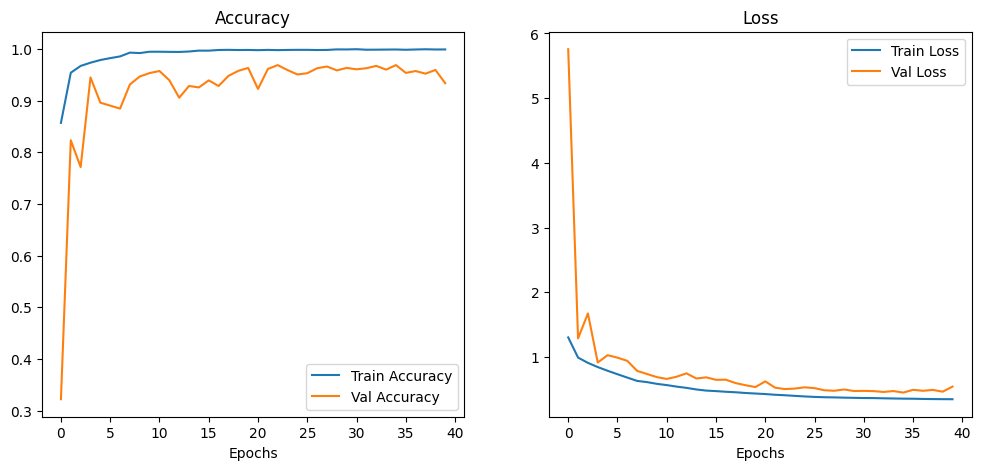

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title('Accuracy'); plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss'); plt.xlabel('Epochs')
plt.show()


In [36]:
model.save("/content/leukemia_cnn_model.h5")


In [37]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9649 - loss: 0.4370
✅ Test Accuracy: 0.9609
✅ Test Loss: 0.4433


In [38]:
# Predict probabilities for each class
y_pred_probs = model.predict(test_ds)

# Get the class with the highest probability
y_pred = np.argmax(y_pred_probs, axis=1)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


In [39]:
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_true = np.argmax(y_true, axis=1)


Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.24      0.23       327
           1       0.17      0.16      0.17       328
           2       0.22      0.24      0.23       327
           3       0.21      0.19      0.20       328
           4       0.21      0.22      0.21       326

    accuracy                           0.21      1636
   macro avg       0.21      0.21      0.21      1636
weighted avg       0.21      0.21      0.21      1636



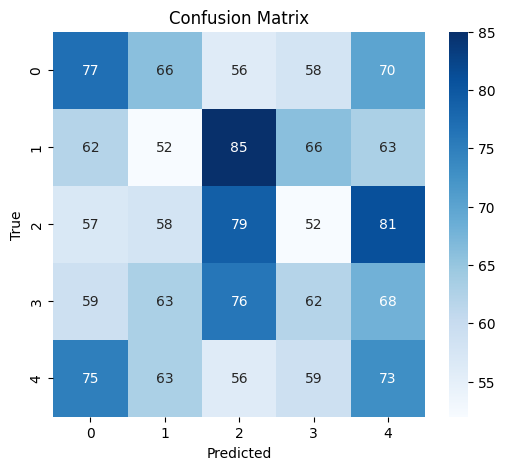

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:\n", classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [44]:
class_names = ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']


In [45]:
class_name = class_names[pred_class]


Saving aug_0_100.jpg to aug_0_100 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


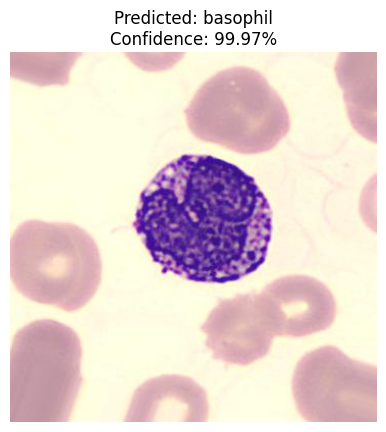

In [47]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
import tensorflow as tf

# Upload image from user
uploaded = files.upload()

# Define your class names (same order as your training folders)
class_names = ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']

for img_path in uploaded.keys():
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize

    # Predict
    predictions = model.predict(img_array)
    pred_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0]) * 100

    # Get predicted class name
    class_name = class_names[pred_class]

    # Display result
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"Predicted: {class_name}\nConfidence: {confidence:.2f}%")
    plt.show()


In [48]:
# Define your class names (based on your folders)
class_names = ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']

# Save them to a text file
with open("class_names.txt", "w") as f:
    for name in class_names:
        f.write(name + "\n")

# Download the file
from google.colab import files
files.download("class_names.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
model.save("/content/leukemia_cnn_model.keras")
